In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

In [2]:
# Load the processed dataset
df = pd.read_csv("data_processed.csv")

In [3]:
# Display the first few rows of the dataset to understand its structure
df.head()

,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age,Item_Identifier,Outlet_Identifier,Item_Weight_zscore,Item_Visibility_zscore,Item_MRP_zscore,Item_Outlet_Sales_zscore,Item_Outlet_Sales_Log
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.139541,0.910601,-0.139541,FDA15,OUT049,0.828359,0.970675,1.747351,0.910548,8.225808
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.334103,-1.018440,-1.334103,DRC01,OUT018,1.625269,0.908058,1.488936,1.018381,6.096776
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.139541,-0.049238,-0.139541,FDN15,OUT049,1.104972,0.956861,0.010040,0.049235,7.648868
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.020085,-0.849103,-0.020085,FDX07,OUT010,1.505785,1.281683,0.660011,0.849053,6.597664
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-1.293934,-0.695373,1.293934,NCD19,OUT013,0.915595,1.281683,1.399138,0.695332,6.903451


In [7]:
# Split the dataset into features (X) and target (y)
# Drop the non-log-transformed 'Item_Outlet_Sales' as we will use the log-transformed version for modeling
# Convert categorical features to numeric using One-Hot Encoding
X = pd.get_dummies(df.drop(['Item_Outlet_Sales', 'Item_Outlet_Sales_Log'], axis=1))
y = df['Item_Outlet_Sales_Log']

In [9]:
# Split the data into training and testing sets
# 70% training data, 30% testing data, with a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
# Check the shapes of training and testing sets
print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)

Training set size: (5966, 1600) (5966,)
Testing set size: (2557, 1600) (2557,)


In [13]:
# Perform feature selection using a RandomForestRegressor to identify important features
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
# Get feature importances and select the top features
importances = rf.feature_importances_
num_features = min(10, len(importances))  # Select top 10 features or fewer if there are less
important_features = X.columns[np.argsort(importances)[-num_features:]]

In [15]:
# Reduce X to only the important features for training and testing
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]
print("Reduced feature set shape:", X_train_important.shape, X_test_important.shape)


Reduced feature set shape: (5966, 10) (2557, 10)


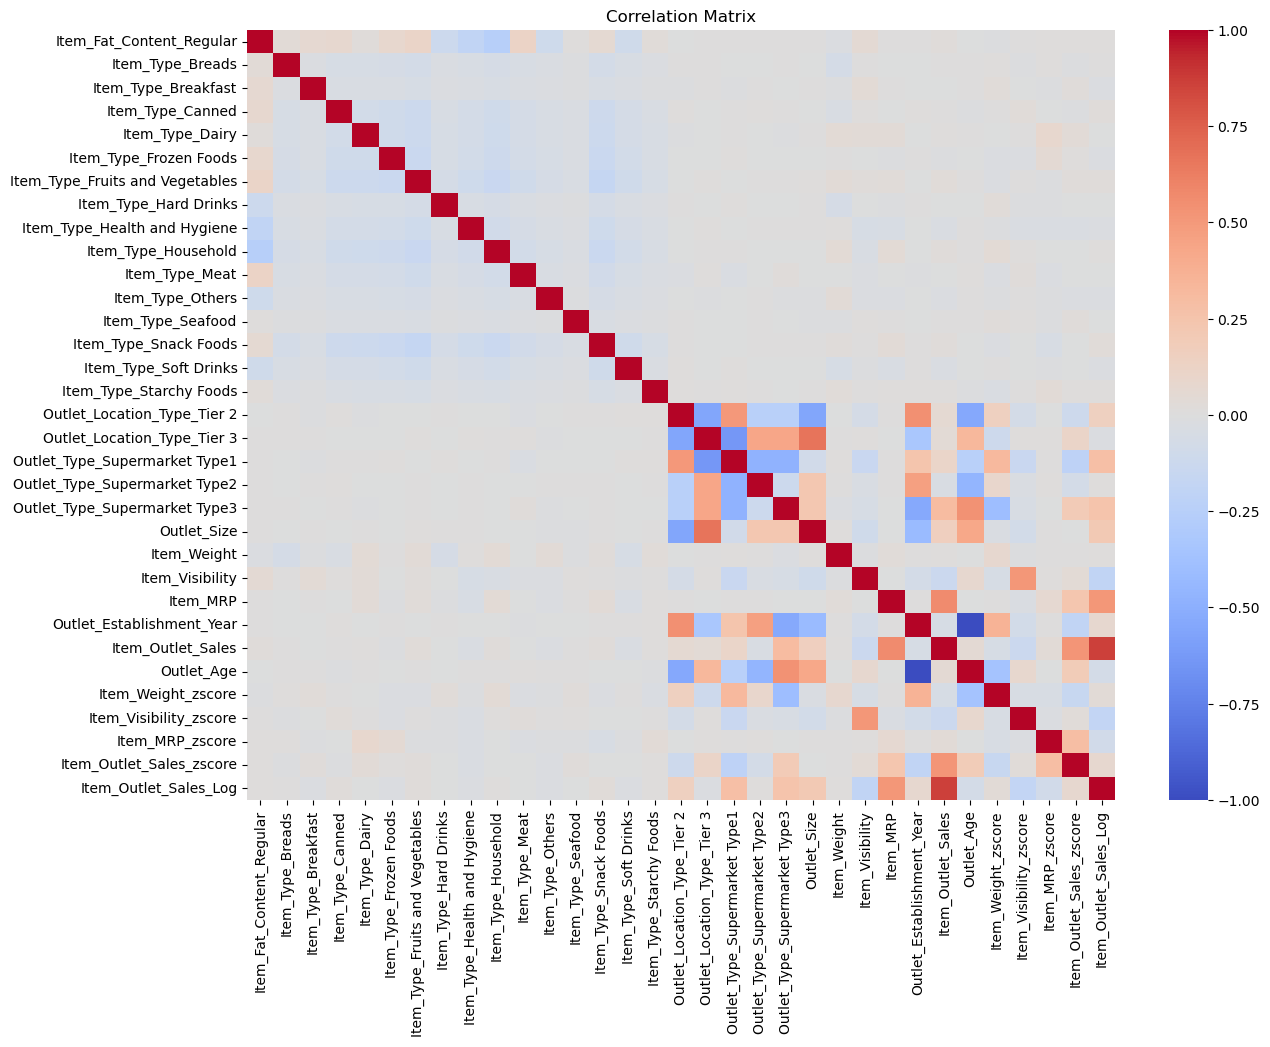

In [17]:

# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Plot the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [18]:
# Define a dictionary of models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'KNeighbors Regression': KNeighborsRegressor(n_neighbors=5),
    'Decision Tree': DecisionTreeRegressor(),
    'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100), max_iter=300, random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}

In [19]:
# Define a function to evaluate each model using cross-validation
def evaluate_models(models, X, y):
    results = {}
    for name, model in models.items():
        # Perform 5-fold cross-validation
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
        results[name] = {
            "Mean R2": cv_scores.mean(),
            "Standard Deviation": cv_scores.std()
        }
    return results

In [20]:

# Evaluate all models on the important features subset
model_results = evaluate_models(models, X_train_important, y_train)

C:\Users\Rimi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Rimi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
# Display the results
for model, metrics in model_results.items():
    print(f"{model}: Mean R2 = {metrics['Mean R2']:.4f}, Std Dev = {metrics['Standard Deviation']:.4f}")

Linear Regression: Mean R2 = 0.7406, Std Dev = 0.0136
Random Forest: Mean R2 = 0.8867, Std Dev = 0.0077
KNeighbors Regression: Mean R2 = 0.8401, Std Dev = 0.0074
Decision Tree: Mean R2 = 0.7986, Std Dev = 0.0219
MLP Regressor: Mean R2 = 0.8788, Std Dev = 0.0046
XGBoost: Mean R2 = 0.8796, Std Dev = 0.0112


In [22]:
# Identify the model with the highest mean R2 score
best_model_name = max(model_results, key=lambda x: model_results[x]["Mean R2"])
print(f"\nBest Model based on R2: {best_model_name}")


Best Model based on R2: Random Forest


In [34]:

# If Random Forest or another model is best, tune it with GridSearchCV for better performance
if best_model_name == "Random Forest":
    # Define the parameter grid for RandomForestRegressor
    param_grid = {
        'n_estimators': [100, 200, 300],            # Number of trees in the forest
        'max_depth': [3, 5, 7],                     # Maximum depth of each tree
        'min_samples_split': [2, 5, 10]             # Minimum samples required to split a node
    }

In [38]:
# Initialize GridSearchCV with the RandomForestRegressor
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=5,             # 5-fold cross-validation
    n_jobs=-1         # Use all available processors
)

In [40]:
# Fit the grid search model to the training data
grid_search.fit(X_train_important, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [42]:
# Display the best parameters and best score found
print("Best parameters found for Random Forest:", grid_search.best_params_)
print("Best R2 score from Grid Search:", grid_search.best_score_)

Best parameters found for Random Forest: {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 300}
Best R2 score from Grid Search: 0.8829537271843144
